# 2   Classifying with k-Nearest Neighbors

## 2.1   Classifying with distance measurements

### 2.1.1   Prepare: importing data with Python

In [9]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

Import 2 modules: NumPy and operator used in the kNN algorithm for sorting.

In [1]:
from numpy import *
import operator

The function `createDataSet()` creates the dataset and labels.

In [3]:
def createDataSet():
    group = array([[1.0,1.1], [1.0,1.0], [0,0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [10]:
group, labels = createDataSet()
group
labels

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

['A', 'A', 'B', 'B']

### 2.1.2   Putting the kNN classification algorithm into action

***Listing 2.1* k-Nearest Neighbors algorithm: `classify0()`**

In [12]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()   # Distance calculation
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1   # Voting with lowest k distances
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)   # Sort dictionary
    # Mind that there is "classCount.items()" instead of "classCount.iteritems()" which has been removed from Python3
    return sortedClassCount[0][0]

In [14]:
classify0([0,0], group, labels, 3)
classify0([0.8,1.0], group, labels, 3)

'B'

'A'

## 2.2   Example: improving matches from a dating site with kNN

### 2.2.1   Prepare: parsing data from a text file

***List 2.2*   Text record to NumPy parsing code: `file2matrix`**

In [27]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())   # Get number of lines in files
    returnMat = zeros((numberOfLines, 3))   # Create NumPy matrix to return
    classLabelVector = []
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')   # Parse a line to a list
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [28]:
datingDataMat, datingLabels = file2matrix('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch02/datingTestSet2.txt')

In [29]:
datingDataMat
datingLabels[0:20]

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

### 2.2.2 Analyze: creating scatter plots with Matplotlib

In [30]:
import matplotlib
import matplotlib.pyplot as plt

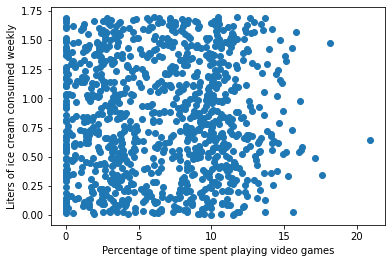

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel = "Percentage of time spent playing video games", 
                     ylabel = "Liters of ice cream consumed weekly")
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
plt.show()

The scatter plot above is about all of the values for the feature "Percentage of time spent playing video games" and "Liters of ice cream consumed weekly" for all the classes put together.

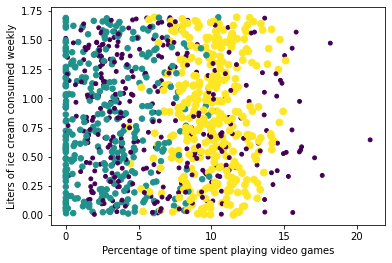

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel = "Percentage of time spent playing video games", 
                     ylabel = "Liters of ice cream consumed weekly")
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0 * array(datingLabels), 15.0 * array(datingLabels))
plt.show()

The scatter plot above is about all of the values for the feature "Percentage of time spent playing video games" and "Liters of ice cream consumed weekly" with different marker sizes and colors.

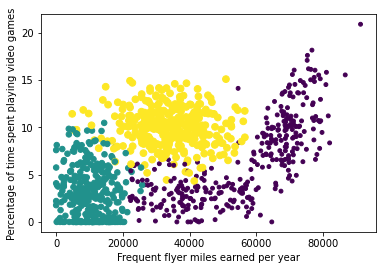

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel = "Frequent flyer miles earned per year", 
                     ylabel = "Percentage of time spent playing video games")
ax.scatter(datingDataMat[:,0], datingDataMat[:,1], 15.0 * array(datingLabels), 15.0 * array(datingLabels))
plt.show()

The scatter plot above is about all of the values for the feature "Liters of ice cream consumed weekly" and "Percentage of time spent playing video games" with different marker sizes and colors.

### 2.2.3   Prepare: normalizing numeric values

***List 2.3*   Data-normalizing code: `autoNorm()`**

In [45]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet / tile(ranges, (m,1))   # Element-wise division
    return normDataSet, ranges, minVals

In [46]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [47]:
normMat
ranges
minVals

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

array([0.      , 0.      , 0.001156])

### 2.2.4   Test: testing the classifier as a whole program

***List 2.4*   Classifier testing code for dating site: `datingClassTest()`**

In [52]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch02/datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))

In [54]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

### 2.2.5   Use: putting together a useful system

***List 2.5*   Dating site predictor function: `classifyPerson()`**

In [57]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing computer games?"))   # Mind that raw_input() has been converted into input() in Python3
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch02/datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr - minVals) / ranges, normMat, datingLabels, 3)
    print("You will probably like this person: ", resultList[classifierResult - 1])

In [58]:
classifyPerson()

percentage of time spent playing computer games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person:  in small doses


## 2.3   Example: a handwriting recognition system

### 2.3.1   Prepare: converting images into test vectors

In [61]:
def img2vector(filename):
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [62]:
testVector = img2vector('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch02/digits/testDigits/0_13.txt')
testVector[0,0:31]
testVector[0,32:63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 2.3.2   Test: kNN on handwriting digits

***Listing 2.6*   Handwriting digits testing code: `handwritingClassTest()`**

In [63]:
from os import listdir

Import `listdir` so as to see the namesof files in a given directory.

In [66]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch02/digits/trainingDigits/')
    # Get contents of directory
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])   # Process class num from filename
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch02/digits/trainingDigits/%s' 
                                     % fileNameStr)
    testFileList = listdir('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch02/digits/testDigits/')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('/Users/duoduo/Desktop/Data/Machine Learning/Machine Learning in Action/MLA_SourceCode/Ch02/digits/testDigits/%s' 
                                    % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount / float(mTest)))

In [67]:
handwritingClassTest()

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answe

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answe

the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 7, the real answe

the classifier came back with: 6, the real answer is: 6
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answe

the classifier came back with: 8, the real answer is: 8
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answe

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answe

the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answe